In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from data_processing import getData

pd.set_option("display.max_columns", None)
plt.rcParams["figure.figsize"] = (20, 10)
plt.rcParams["axes.titlesize"] = 30
plt.rcParams["axes.labelsize"] = 20

# Filling/Removing missing values in the Data

In [154]:
df = getData()

/tmp/ipykernel_8314/743798274.py:1: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  df = getData()


In [155]:
print("Percentage of missing values for each column")
temp = (df.isna().sum() / len(df)).to_frame()
temp.T

Percentage of missing values for each column


,continent,location,date,total_cases,new_cases,reproduction_rate,new_tests,total_tests,positive_rate,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,CountryCode,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,C4_Flag,C5_Close public transport,C5_Flag,C6_Stay at home requirements,C6_Flag,C7_Restrictions on internal movement,C7_Flag,C8_International travel controls,E1_Income support,E1_Flag,E2_Debt/contract relief,E3_Fiscal measures,E4_International support,H1_Public information campaigns,H1_Flag,H2_Testing policy,H3_Contact tracing,H4_Emergency investment in healthcare,H5_Investment in vaccines,H6_Facial Coverings,H6_Flag,H7_Vaccination policy,H7_Flag,H8_Protection of elderly people,H8_Flag,ConfirmedDeaths,StringencyIndex,StringencyIndexForDisplay,StringencyLegacyIndex,StringencyLegacyIndexForDisplay,GovernmentResponseIndex,GovernmentResponseIndexForDisplay,ContainmentHealthIndex,ContainmentHealthIndexForDisplay,EconomicSupportIndex,EconomicSupportIndexForDisplay,new_deaths,weekday
0,0.0,0.0,0.0,0.0,0.0,0.087905,0.393392,0.392234,0.404978,0.290949,0.297231,0.317585,0.292572,0.0,0.017592,0.0,0.0,0.041059,0.041334,0.327045,0.0,0.0,0.213254,0.0,0.0,0.114038,0.0,0.0,0.0,0.016378,0.16004,0.016691,0.179426,0.01652,0.134714,0.017052,0.151216,0.016909,0.521454,0.016663,0.324702,0.017222,0.462794,0.016511,0.017944,0.371757,0.019614,0.178629,0.177813,0.017023,0.029586,0.017811,0.020714,0.178202,0.045063,0.016188,0.138795,0.01634,0.574763,0.020544,0.297696,0.001623,0.016843,0.010466,0.016663,0.010286,0.021379,0.014651,0.019244,0.012801,0.02061,0.014015,0.001623,0.0


In [156]:
# Regression cannot handle NaN-values, so we'll have to get rid of the columns that have too many of them
threshhold = 0.1
cols_to_keep = temp[(temp < threshhold).to_numpy()].index
df = df[cols_to_keep]
# we'll replace the remaining missing values with the mean of that column
df.fillna(df.mean(), inplace=True)
df.head()

/tmp/ipykernel_8314/2206387269.py:6: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df.fillna(df.mean(), inplace=True)
/tmp/ipykernel_8314/2206387269.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


,continent,location,date,total_cases,new_cases,reproduction_rate,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,male_smokers,handwashing_facilities,life_expectancy,human_development_index,CountryCode,C1_School closing,C2_Workplace closing,C3_Cancel public events,C4_Restrictions on gatherings,C5_Close public transport,C6_Stay at home requirements,C7_Restrictions on internal movement,C8_International travel controls,E1_Income support,E2_Debt/contract relief,H1_Public information campaigns,H1_Flag,H2_Testing policy,H3_Contact tracing,H5_Investment in vaccines,H6_Facial Coverings,H7_Vaccination policy,H8_Protection of elderly people,ConfirmedDeaths,StringencyIndex,StringencyIndexForDisplay,StringencyLegacyIndex,StringencyLegacyIndexForDisplay,GovernmentResponseIndex,GovernmentResponseIndexForDisplay,ContainmentHealthIndex,ContainmentHealthIndexForDisplay,EconomicSupportIndex,EconomicSupportIndexForDisplay,new_deaths,weekday
0,Asia,Afghanistan,2020-02-24,5.0,5.0,1.003609,39835428.0,54.422,18.6,2.581,1.337,1803.987,597.029,9.59,39.697368,37.746,64.83,0.511,AFG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.99557,1.0,1.0,0.0,0.0,0.0,0.0,0.0,8.33,8.33,10.71,10.71,9.9,9.9,11.31,11.31,0.0,0.0,0.0,0
1,Asia,Afghanistan,2020-02-25,5.0,0.0,1.003609,39835428.0,54.422,18.6,2.581,1.337,1803.987,597.029,9.59,39.697368,37.746,64.83,0.511,AFG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.99557,1.0,1.0,0.0,0.0,0.0,0.0,0.0,8.33,8.33,10.71,10.71,9.9,9.9,11.31,11.31,0.0,0.0,0.0,1
2,Asia,Afghanistan,2020-02-26,5.0,0.0,1.003609,39835428.0,54.422,18.6,2.581,1.337,1803.987,597.029,9.59,39.697368,37.746,64.83,0.511,AFG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.99557,1.0,1.0,0.0,0.0,0.0,0.0,0.0,8.33,8.33,10.71,10.71,9.9,9.9,11.31,11.31,0.0,0.0,0.0,2
3,Asia,Afghanistan,2020-02-27,5.0,0.0,1.003609,39835428.0,54.422,18.6,2.581,1.337,1803.987,597.029,9.59,39.697368,37.746,64.83,0.511,AFG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.99557,1.0,1.0,0.0,0.0,0.0,0.0,0.0,8.33,8.33,10.71,10.71,9.9,9.9,11.31,11.31,0.0,0.0,0.0,3
4,Asia,Afghanistan,2020-02-28,5.0,0.0,1.003609,39835428.0,54.422,18.6,2.581,1.337,1803.987,597.029,9.59,39.697368,37.746,64.83,0.511,AFG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.99557,1.0,1.0,0.0,0.0,0.0,0.0,0.0,8.33,8.33,10.71,10.71,9.9,9.9,11.31,11.31,0.0,0.0,0.0,4


# Analysing the Data

Text(0, 0.5, 'Number of new cases')

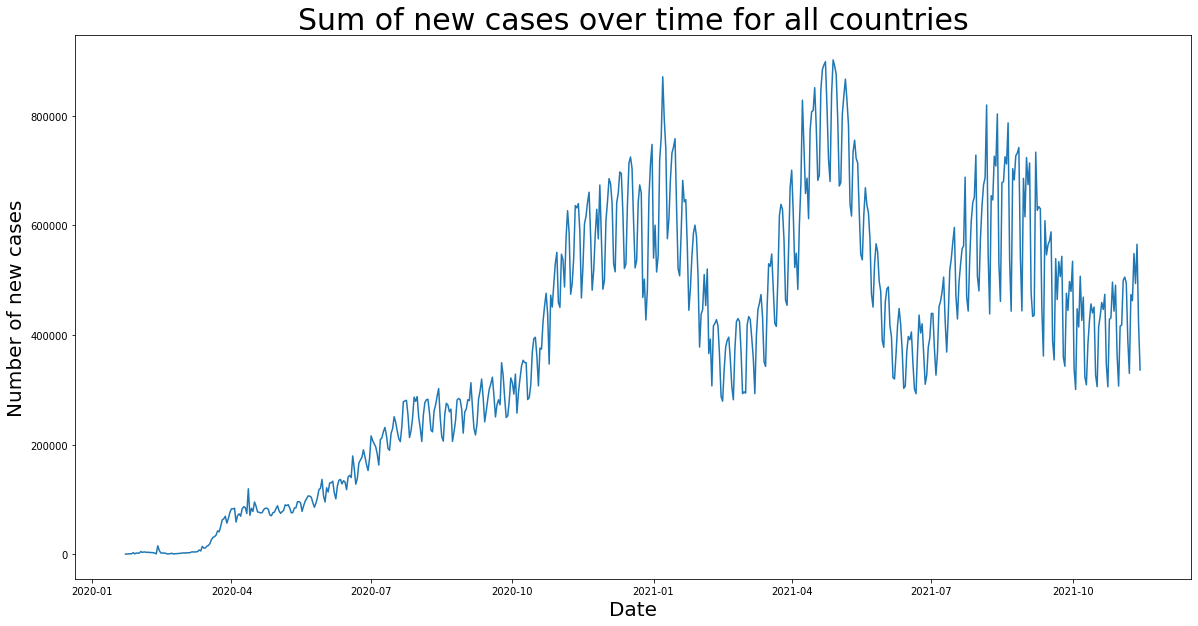

In [157]:
# since we want to predict the number of new cases, we should first take a look at that column
groupby_date = df[["date", "new_cases"]].groupby("date").sum()
plt.plot(groupby_date.index, groupby_date)
plt.title("Sum of new cases over time for all countries")
plt.xlabel("Date")
plt.ylabel("Number of new cases")

In [158]:
# from https://stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart
def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

Text(0, 0.5, 'Number of new cases')

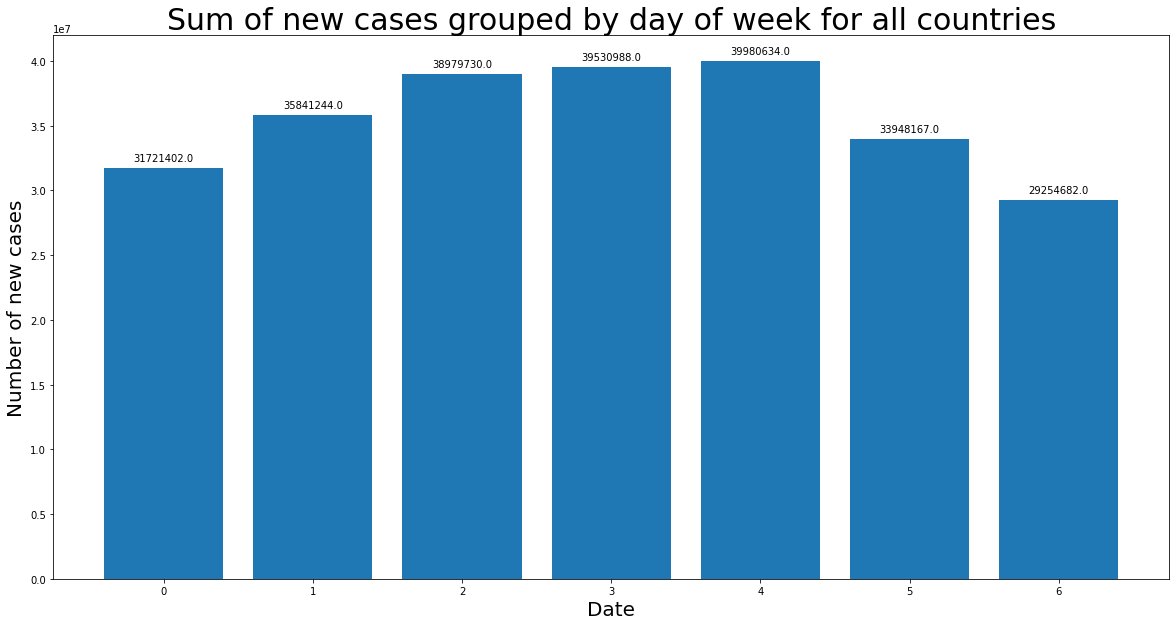

In [159]:
# ok we can see a lot of small spikes and valleys in the history, maybe these come from the weekdays (on weekends not as much tests are done)?
groupby_weekday = df[["weekday", "new_cases"]].groupby("weekday").sum()
fig, ax = plt.subplots()
ax.bar(groupby_weekday.index, groupby_weekday["new_cases"])
add_value_labels(ax)
ax.set_title("Sum of new cases grouped by day of week for all countries")
ax.set_xlabel("Date")
ax.set_ylabel("Number of new cases")